In [ ]:
# Raghav Kalyanaraman

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'2.2.3'

In [7]:
data = pd.read_csv('train.csv')
df = pd.DataFrame(data)

print(data.isnull().sum())
# print("Total Number of Missing Values: ", data.isnull().sum().sum())

# print(df)

# print(df.columns)

# print(df.info())

# Print the frequency of output classs: Output Type
print(df['Outcome Type'].value_counts())



Id                      0
Name                31383
Intake Time             0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         2
Age upon Intake         1
Breed                   0
Color                   0
Outcome Time            0
Date of Birth           0
Outcome Type            0
dtype: int64
Outcome Type
Adoption           55044
Transfer           35024
Return to Owner    16599
Euthanasia          3449
Died                1041
Name: count, dtype: int64


Mean (months):  22.879773321578085
Median (months):  12.0


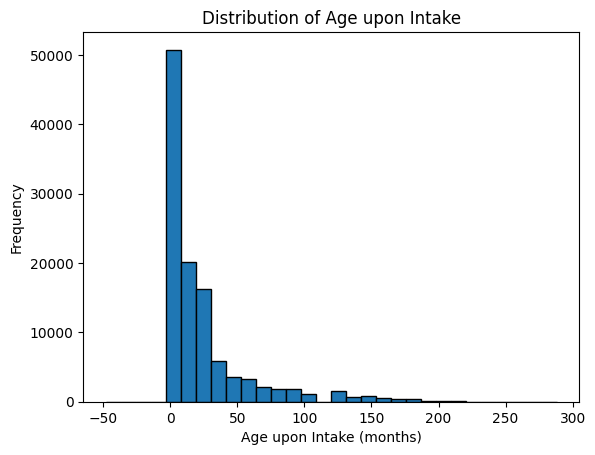

In [157]:
#Remove the columns that are not needed
df = df.drop(['Name'], axis=1)
df = df.drop(['Found Location'], axis=1)

# Determine age distribution


# Need to convert all values in 'Age upon Intake' to numeric
# Convert 'Age upon Intake' to numeric by extracting the numeric part and converting to months
def convert_age_to_months(age):
    if pd.isnull(age):
        return None
    parts = age.split()
    if "year" in parts[1]:
        return int(parts[0]) * 12
    elif "month" in parts[1]:
        return int(parts[0])
    elif "week" in parts[1]:
        return int(parts[0]) / 4
    elif "day" in parts[1]:
        return int(parts[0]) / 30
    else:
        return None
    
def convert_age_to_weeks(age):
    if pd.isnull(age):
        return None
    parts = age.split()
    if "year" in parts[1]:
        return int(parts[0]) * 52
    elif "month" in parts[1]:
        return int(parts[0]) * 4
    elif "week" in parts[1]:
        return int(parts[0])
    elif "day" in parts[1]:
        return int(parts[0]) / 7
    else:
        return None

# Convert 'Age upon Intake' to months
df['Age upon Intake'] = df['Age upon Intake'].apply(convert_age_to_months)

# Convert 'Age upon Intake' to weeks

# Check for missing values in 'Age upon Intake' column
#Print some of the missing values in 'Age upon Intake' column

mean = df['Age upon Intake'].mean()
median = df['Age upon Intake'].median()

print("Mean (months): ", mean)
print("Median (months): ", median)

# Try graphing the distribution of 'Age upon Intake'
plt.hist(df['Age upon Intake'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age upon Intake (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Age upon Intake')

# Impute the missing values with the median
df['Age upon Intake'] = df['Age upon Intake'].fillna(median)
# Check for missing values in 'Age upon Intake' column again'




0


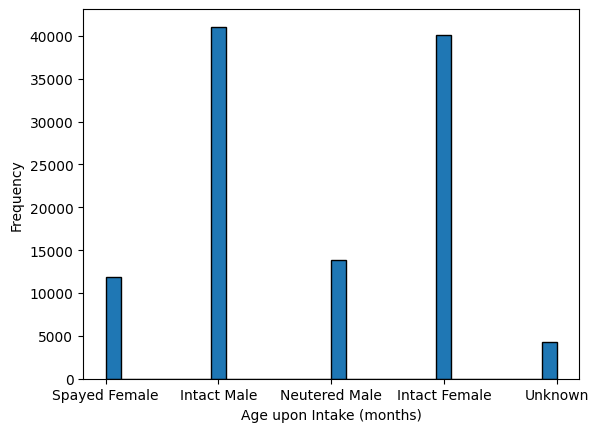

In [158]:
#Evaluate the Sex Upon Intake column

#Graph Sex upon intake
plt.hist(df['Sex upon Intake'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age upon Intake (months)')
plt.ylabel('Frequency')

#We have an unknown category for Sex Upon Intake
# We can impute the missing values with the unknown category

# Impute Sex Upon Intake with the mode value

# Impute the missing values with 'Unknown'
df['Sex upon Intake'] = df['Sex upon Intake'].fillna('Unknown')

# Verify the imputation
print(df['Sex upon Intake'].isnull().sum())

In [159]:
# Intake time/Out time

#Adust the date format to be consistent
df['Intake Time'] = pd.to_datetime(df['Intake Time'])

# print(df['Intake Time'].head())

df['hour'] = df['Intake Time'].dt.hour
df['dayofweek'] = df['Intake Time'].dt.dayofweek
df['month'] = df['Intake Time'].dt.month
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

df = df.drop(columns=['Intake Time'])







In [160]:
# Color of the animal

# Different values of color in the dataset

# Split the color into primary and secondary colors
# Determine how many have only a primary color

# Split the 'Color' column into primary and secondary colors
def split_colors(color):
    if pd.isnull(color):
        return None, None
    parts = color.replace('/', ' ').split()  # Replace '/' with space and split
    primary = parts[0] if len(parts) > 0 else None
    secondary = ' '.join(parts[1:]) if len(parts) > 1 else None
    return primary, secondary

df[['Primary Color', 'Secondary Color']] = df['Color'].apply(
    lambda x: pd.Series(split_colors(x))
)

#Remove the secondary color column FOR NOW:
df = df.drop(['Secondary Color'], axis=1)

print(df['Primary Color'].isnull().sum())

# Determine how many have only a primary color


# Display the first few rows to verify
# print(df[['Color', 'Primary Color', 'Secondary Color']].head())


# Display the first few primary only colors
# Print all unique primary only colors


# Print all unique primary colors of the animals
# # Print all unique secondary colors of the animals

0


['Dog' 'Cat']
Number of dogs: 61378
Number of cats: 49779


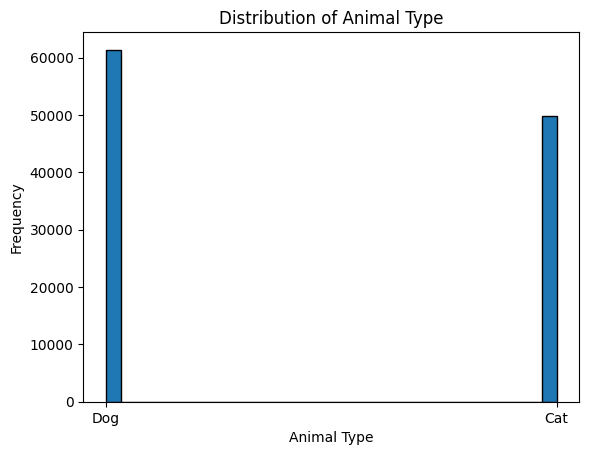

In [161]:
# Animal Type

print(df['Animal Type'].unique())
print("Number of dogs:", len(df[df['Animal Type'] == 'Dog']))
print("Number of cats:", len(df[df['Animal Type'] == 'Cat']))
# Graph the animal type
plt.hist(df['Animal Type'], bins=30, edgecolor='black')
plt.xlabel('Animal Type')
plt.ylabel('Frequency')
plt.title('Distribution of Animal Type')
plt.show()

Number of unique breeds: 2440


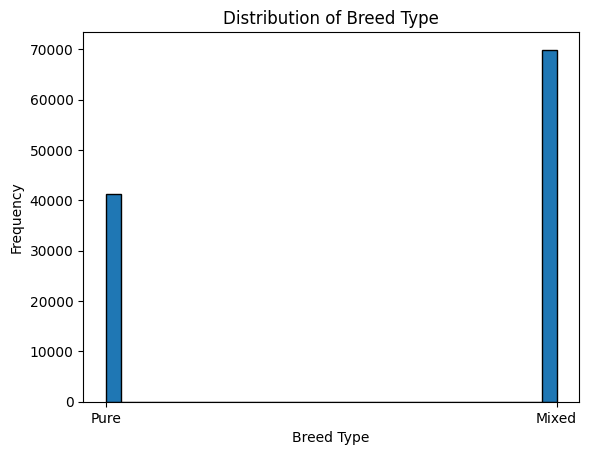

In [162]:
# Breed 

print("Number of unique breeds:", len(df['Breed'].unique()))


# For now we will just split pure breeds and mixed breeds
df['Breed Type'] = df['Breed'].apply(lambda x: 'Mixed' if 'Mix' in x else 'Pure')
# Graph the breed type
plt.hist(df['Breed Type'], bins=30, edgecolor='black')
plt.xlabel('Breed Type')
plt.ylabel('Frequency')
plt.title('Distribution of Breed Type')
plt.show()




Grouped intake conditions:
['Health Status' 'Life stage' 'Other' 'Medical-related' 'Behavioral']


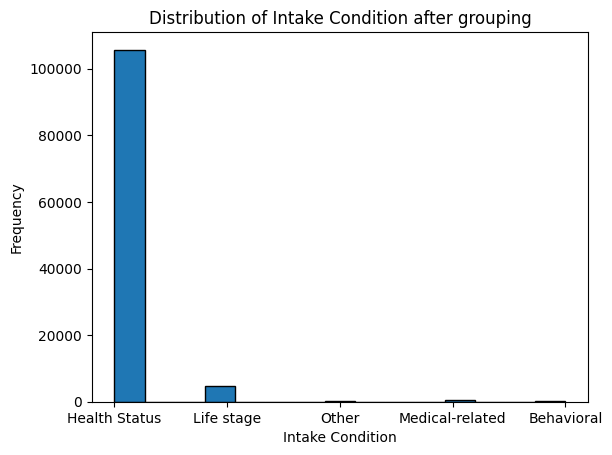

In [163]:
# Intake Condition
# # Graph the intake condition

# Group the intake condition into the following:
# Medical-related: 'Med Attn', 'Medical', 'Med Urgent', 'Neurologic', 'Congenital', 'Parvo', 'Agonal'
# Life stage: 'Neonatal', 'Aged', 'Pregnant', 'Nursing'
# Health status: 'Normal', 'Injured', 'Sick', 'Behavior', 'Feral'
# Other: 'Unknown', 'Other', 'Space'

def group_intake_condition(condition):
    if pd.isnull(condition):
        return 'Other'
    condition = condition.lower()
    if condition in ['med attn', 'medical', 'med urgent', 'neurologic', 'congenital', 'parvo', 'agonal']:
        return 'Medical-related'
    elif condition in ['neonatal', 'aged', 'pregnant', 'nursing']:
        return 'Life stage'
    elif condition in ['normal', 'injured', 'sick']:
        return 'Health Status'
    elif condition in ['behavior', 'feral']:
        return 'Behavioral'
    else:
        return 'Other'

df['Intake Condition'] = df['Intake Condition'].apply(group_intake_condition)
# Verify the grouping  
print("Grouped intake conditions:")
print(df['Intake Condition'].unique())


# Graph the intake condition after grouping
plt.hist(df['Intake Condition'], bins=15, edgecolor='black')
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Intake Condition after grouping')
plt.show()


['Stray' 'Public Assist' 'Owner Surrender' 'Abandoned'
 'Euthanasia Request' 'Wildlife']
Number of unique intake types: 6
Number of unique intake types after combining: 4


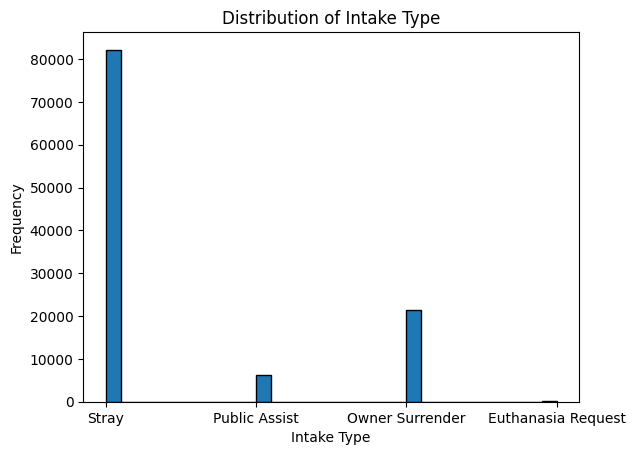

In [164]:
# Intake Type
print(df['Intake Type'].unique())
print("Number of unique intake types:", len(df['Intake Type'].unique()))


#Combine abandoned with wildlife (wildlife only has 1 record)

df['Intake Type'] = df['Intake Type'].replace('Abandoned', 'Wildlife')
# Remove the 'Wildlife' category from the intake type
df = df[df['Intake Type'] != 'Wildlife']

print("Number of unique intake types after combining:", len(df['Intake Type'].unique()))

# Graph the intake type
plt.hist(df['Intake Type'], bins=30, edgecolor='black')
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Distribution of Intake Type')
plt.show()


In [165]:
# # Review all the columns in the dataset

# Drop the columns that are not needed
df = df.drop(['Outcome Time', 'Color', 'Breed', 'Id', 'Date of Birth'], axis=1)

print(df.columns)
print(df.head())
print(df.info())




Index(['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Outcome Type', 'hour', 'dayofweek', 'month',
       'is_weekend', 'Primary Color', 'Breed Type'],
      dtype='object')
       Intake Type Intake Condition Animal Type Sex upon Intake  \
0            Stray    Health Status         Dog   Spayed Female   
1            Stray    Health Status         Dog     Intact Male   
2    Public Assist    Health Status         Cat   Neutered Male   
3  Owner Surrender    Health Status         Dog   Neutered Male   
4    Public Assist    Health Status         Dog   Neutered Male   

   Age upon Intake     Outcome Type  hour  dayofweek  month  is_weekend  \
0             96.0  Return to Owner    12          6      7           1   
1             11.0  Return to Owner    18          3      4           0   
2             24.0         Transfer     0          3      5           0   
3             24.0  Return to Owner    12          5      2           1   

In [166]:
from sklearn.metrics import balanced_accuracy_score, make_scorer, classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_val_predict



# Assuming df is your full DataFrame
features = df.drop('Outcome Type', axis=1)  # Features
labels = df['Outcome Type']               # Target

le = LabelEncoder()
labels = le.fit_transform(df['Outcome Type'])  # Encode labels first

# One hot encode categorical variables: Sex Upon Intake, Color, Animal Type, Breed Type, Intake Type
# one_hot_cols = ['Sex upon Intake', 'Primary Color', 'Animal Type', 'Breed Type', 'Intake Type']
# df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


# # Frequency encoding for the categorical variables: Intake condition (freq)

# intake_condition_freq = df['Intake Condition'].value_counts(normalize=True) 
# df['Intake Condition'] = df['Intake Condition'].map(intake_condition_freq)

categorical_cols = ['Sex upon Intake', 'Primary Color', 'Animal Type', 
                   'Breed Type', 'Intake Type', 'Intake Condition']

for col in categorical_cols:
    features[col] = LabelEncoder().fit_transform(features[col].astype(str))



# Verify the encoding
# print(df.head())

# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=y, random_state=42)

# print(f"Training set: {len(X_train)}")
# print(f"Test set: {len(X_test)}")

randomForest = RandomForestClassifier(random_state=10)
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
}

gs_rf = GridSearchCV(randomForest, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
predictions = cross_val_predict(gs_rf, features, labels, cv=5)

print("Classification Report:")
print(classification_report(labels, predictions))

gs_rf.fit(features, labels)

print(f"Best Parameter: {gs_rf.best_params_}")
print(f"Best Accuracy: {gs_rf.best_score_:.4f}")


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.73     54267
           1       0.53      0.02      0.05      1036
           2       0.60      0.07      0.12      3441
           3       0.58      0.54      0.56     16486
           4       0.67      0.44      0.53     34693

    accuracy                           0.64    109923
   macro avg       0.60      0.38      0.40    109923
weighted avg       0.64      0.64      0.61    109923

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameter: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.6378


In [167]:
# Given the best parameters, we can now train the model on the entire dataset
best_rf = RandomForestClassifier(**gs_rf.best_params_, random_state=10)
best_rf.fit(features, labels)
predictions = best_rf.predict(features)
print("Final Classification Report:")
print(classification_report(labels, predictions))
print("Final Accuracy:", accuracy_score(labels, predictions))
print("Confusion Matrix:")
print(confusion_matrix(labels, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(labels, predictions))
print("Feature Importances:")
importances = best_rf.feature_importances_
print(importances)




Final Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     54267
           1       0.98      0.21      0.34      1036
           2       0.98      0.32      0.49      3441
           3       0.80      0.71      0.76     16486
           4       0.89      0.65      0.75     34693

    accuracy                           0.79    109923
   macro avg       0.88      0.57      0.63    109923
weighted avg       0.81      0.79      0.78    109923

Final Accuracy: 0.7913721423178043
Confusion Matrix:
[[51376     0     0  1332  1559]
 [  491   215     5    51   274]
 [ 1337     2  1117   328   657]
 [ 4364     1     7 11735   379]
 [10987     1     7  1151 22547]]
Balanced Accuracy Score: 0.5681173818382528
Feature Importances:
[0.08749346 0.01681408 0.04822189 0.12009477 0.23513107 0.14566012
 0.08198986 0.12411396 0.01130358 0.10184666 0.02733055]


In [ ]:
# Based on the given model use the data from test.csv to predict the outcome type
test_data = pd.read_csv('test.csv')
test_df = pd.DataFrame(test_data)

print(len(test_df))

# Preprocess the test data in the same way as the training data
# df = df.drop(['Outcome Time', 'Color', 'Breed', 'Id', 'Date of Birth'], axis=1)

# Remove the columns that are not needed
test_df = test_df.drop(['Id', 'Date of Birth', 'Found Location'], axis=1)

# Convert 'Age upon Intake' to months
test_df['Age upon Intake'] = test_df['Age upon Intake'].apply(convert_age_to_months)
# Impute the missing values with the median
test_df['Age upon Intake'] = test_df['Age upon Intake'].fillna(median)
# Impute missing values with unknown
test_df['Sex upon Intake'] = test_df['Sex upon Intake'].fillna('Unknown')

test_df['Intake Time'] = pd.to_datetime(test_df['Intake Time'])

# print(df['Intake Time'].head())

test_df['hour'] = test_df['Intake Time'].dt.hour
test_df['dayofweek'] = test_df['Intake Time'].dt.dayofweek
test_df['month'] = test_df['Intake Time'].dt.month
test_df['is_weekend'] = test_df['dayofweek'].isin([5, 6]).astype(int)

test_df = test_df.drop(columns=['Intake Time'], axis=1)

test_df[['Primary Color', 'Secondary Color']] = test_df['Color'].apply(
    lambda x: pd.Series(split_colors(x))
)

#Remove the seconddary color column FOR NOW:
test_df = test_df.drop(['Secondary Color'], axis=1)

# Combine abandoned with wildlife (wildlife only has 1 record)
test_df['Intake Type'] = test_df['Intake Type'].replace('Abandoned', 'Wildlife')
# Remove the 'Wildlife' category from the intake type

# Make a breed type column with pure and mixed breeds
test_df['Breed Type'] = test_df['Breed'].apply(lambda x: 'Mixed' if 'Mix' in x else 'Pure')

# Group the intake condition into the following:

test_df['Intake Condition'] = test_df['Intake Condition'].apply(group_intake_condition)

test_df = test_df.drop(['Color', 'Breed'], axis=1)

# print(test_df.columns)
# print(test_df.head())
# print(test_df.info())


# Now we need to encode the categorical variables in the test data
for col in categorical_cols:
    test_df[col] = LabelEncoder().fit_transform(test_df[col].astype(str))

# Ensure the test data has the same columns as the training data
assert list(features.columns) == list(test_df.columns)


# Run the model on the test data
predictions = best_rf.predict(test_df)
print("Predictions on test data:")
print(predictions)
print("Predictions shape:", predictions.shape)
print("Length of predictions:", len(predictions))

# Decode the predictions back to the original labels
decoded_predictions = le.inverse_transform(predictions)
print("Decoded Predictions:")
print(decoded_predictions)

# Save the predictions to a CSV file
submission_df = pd.DataFrame({'Id': test_data['Id'], 'Outcome Type': decoded_predictions})
submission_df.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")
print(submission_df.head())



27791


C:\Users\Raghav\AppData\Local\Temp\ipykernel_7976\4012461605.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Intake Time'] = pd.to_datetime(test_df['Intake Time'])


hi 27791
Predictions on test data:
[3 0 3 ... 0 0 4]
Predictions shape: (27791,)
Length of predictions: 27791
Decoded Predictions:
['Return to Owner' 'Adoption' 'Return to Owner' ... 'Adoption' 'Adoption'
 'Transfer']
Submission file saved as submission.csv
   Id     Outcome Type
0   1  Return to Owner
1   2         Adoption
2   3  Return to Owner
3   4         Adoption
4   5         Transfer
